In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data

In [2]:
df=pd.read_csv('Petrol_consumption.csv')

In [3]:
#EDA(Exploratory Data Analysis)

df.head() Returns the first 5 rows of the dataframe

In [4]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


df.tail()Returns the last 5 rows of the dataframe

In [5]:
df.tail()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
43,7.0,3745,2611,0.508,591
44,6.0,5215,2302,0.672,782
45,9.0,4476,3942,0.571,510
46,7.0,4296,4083,0.623,610
47,7.0,5002,9794,0.593,524


df.shape gives no.of rows and columns

In [6]:
df.shape

(48, 5)

isnull(). sum(). sum() returns the number of missing values in the data set

In [7]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

<AxesSubplot:>

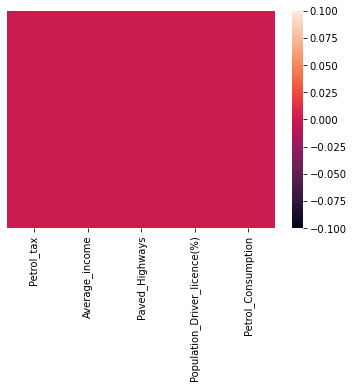

In [8]:
sns.heatmap(df.isnull(),yticklabels=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [10]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [11]:
corr=df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [17]:
X=df.drop('Petrol_Consumption',axis=1)
y=df['Petrol_Consumption']

In [18]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X=SC.fit_transform(X)
X.shape

(48, 4)

In [19]:
X=df.drop('Petrol_Consumption',axis=1)
y=df['Petrol_Consumption']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-37.908126
Average_income,-0.066105
Paved_Highways,-0.002449
Population_Driver_licence(%),1253.453904


Making Predictions

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
45,510,518.133070
7,467,494.929276
2,561,575.574469
9,498,556.573354
5,457,429.368167
13,508,572.680728
19,640,673.812456
42,632,646.446189
0,541,525.114119
18,865,765.030366


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 34.14745075448238
Mean Squared Error: 1907.0959980008872
Root Mean Squared Error: 43.670310257666905


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
clf=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=40)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('MSE : ',mean_squared_error(y_test,predictions))
print('R2_score:',r2_score(y_test,predictions))

MSE :  2364.712808615003
R2_score: 0.41766742959076564
